2학년 1학기 분석프로그래밍1 복습용

# 시각화 기본 (Seaborn)

- Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rc # 한글 그래픽 처리
import seaborn as sns

- 한글폰트로 바꾸기

In [ ]:
rc('font', family='malgun gothic')
rc('axes', unicode_minus=False)

In [4]:
titanic = sns.load_dataset("titanic")
display(titanic.head())
iris = sns.load_dataset("iris")
display(iris.head())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Figure style
- Seaborn에서는 Matplotlib에서 제공하는 기본 스타일이 아닌 Seaborn에서 지정한 기본 스타일로 바꾼다
- `set` 명령으로 전반적인 플롯 스타일(색상, 틱 스타일)을 Seaborn 기본 스타일로 바꾼다.
- `set_style` 명령은 틱 스타일만 바꾸며  `darkgrid`, `whitegrid`, `dark`, `white`, `ticks` 스타일을 제공한다.
- `set_color_codes` 명령으로는 기본 색상을 가리키는 문자열을 바꾼다. 예를 들어 `set_color_codes` 명령이 적용되기 이전과 이후에 `red` 문자열이 가리키는 실제 색상 코드는 다르다.

* `set`: http://seaborn.pydata.org/generated/seaborn.set.html
* `set_style`: http://seaborn.pydata.org/generated/seaborn.set_style.html
* `set_color_codes`: http://seaborn.pydata.org/generated/seaborn.set_color_codes.html

In [5]:
sns.set_style("white")

#Seaborn의 Style을 변경했으면, 한글처리를 위해 아래 명령어를 다시 실행해야 한다.
rc('font', family='malgun gothic')
rc('axes', unicode_minus=False)

### Pair Plot
- pairplot은 데이터프레임을 인수로 받음
- 그리드(grid) 형태로 각 데이터 열의 조합에 대해 스캐터 플롯을 그림
- 같은 데이터가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그림

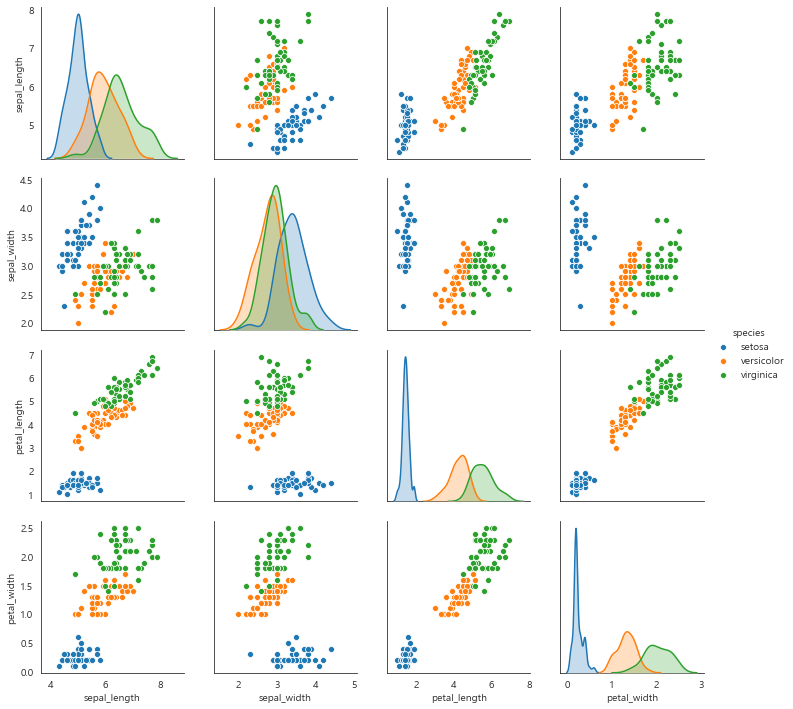

In [6]:
# hue='species'  species기준추가
sns.pairplot(data=iris, hue='species')
plt.show()

C:\Users\82109\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


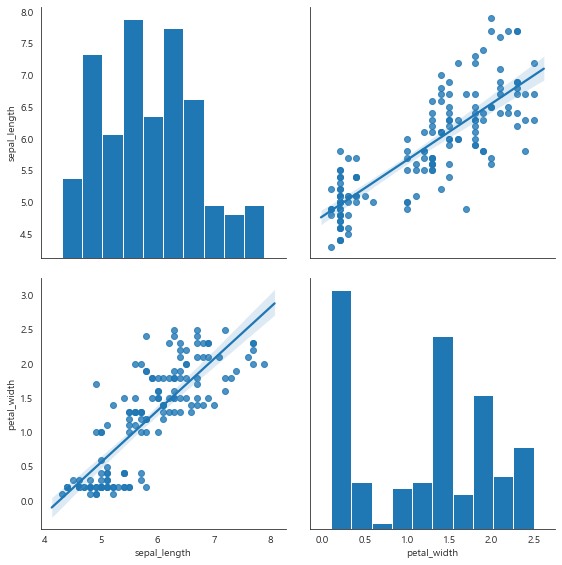

In [7]:
# kind='reg'(추세선을 같이그린다)
# vars = [] 리스트에 있는 것을 원소로 사용
# size = 4 4개의 그래프를 그리겠다
sns.pairplot(data=iris, vars=['sepal_length', 'petal_width'], kind='reg', size=4)

plt.show()

### Count Plot
- 카테고리 값별로 데이터가 얼마나 있는지 표시하는 바 차트

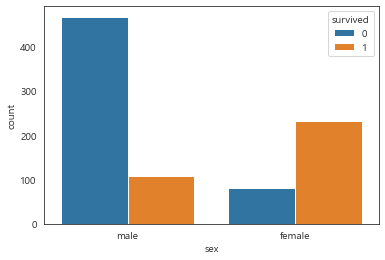

In [8]:
sns.countplot(x="sex", hue="survived", data=titanic)
plt.show()

- 기존에 배웠던 figure axes를 이용해 두개의 그래프를 그리는 것도 가능함

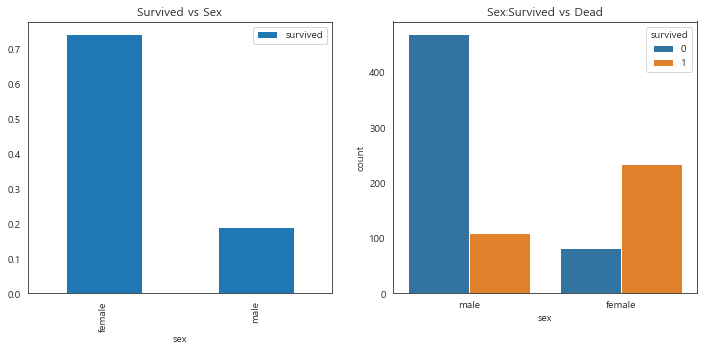

In [9]:
f, ax = plt.subplots(1, 2, figsize=(12,5))

# 성별별 survived한 사람의 비율
ax[0].set_title('Survived vs Sex')
titanic[['sex','survived']].groupby(['sex']).mean().plot.bar(ax=ax[0])

# 성별별 survived한 사람의 수
ax[1].set_title('Sex:Survived vs Dead')
sns.countplot('sex',hue='survived',data=titanic, ax=ax[1])

plt.show()

### Bar Plot
- barplot 은 카테고리 값에 따른 실수 값의 평균과 편차를 표시하는 기본적인 바 차트를 생성한다. 
- 평균은 막대의 높이로, 편차는 에러바(error bar)로 표시한다.

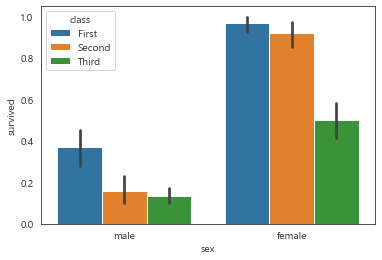

In [10]:
#검은색선은 표준편차
sns.barplot(x="sex", y="survived", hue="class", data=titanic)
plt.show()

### Box Plot
- 통계치를 빠르게 확인할 때 사용하는 그래프
- 1사분위수(Q1)와 3사분위수(Q3), 중앙값을 나타낸다
- 이상치(outlier)는 일일히 점으로 표시한다

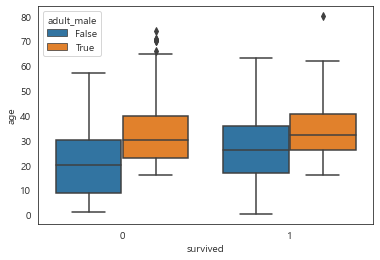

In [11]:
sns.boxplot(x="survived", y="age", hue="adult_male", data=titanic)
plt.show()

### Violin Plot
- 카테고리값에 따른 각 분포의 실제 데이터나 전체 형상을 보여줌

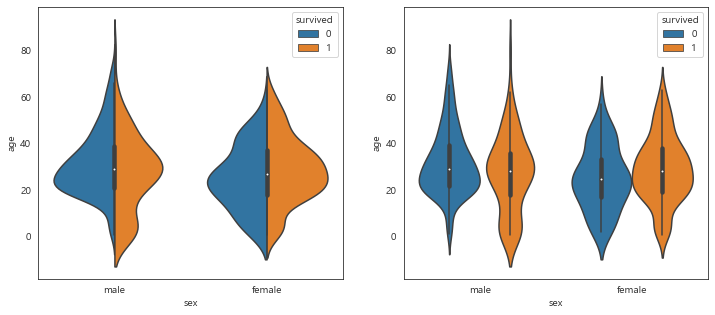

In [18]:
f, ax = plt.subplots(1, 2, figsize=(12,5))

sns.violinplot(x="sex", y='age', hue='survived', split=True, data=titanic, ax = ax[0])

sns.violinplot(x="sex", y='age', hue='survived', split=False, data=titanic, ax = ax[1])
plt.show()

### Scatter Plot(jointplot)
- 스캐터 플롯을 그리기 위해서는 Seaborn패키지의 jointplot을 사용
- 차트의 가장자리에 각 변수의 히스토그램도 그려줌

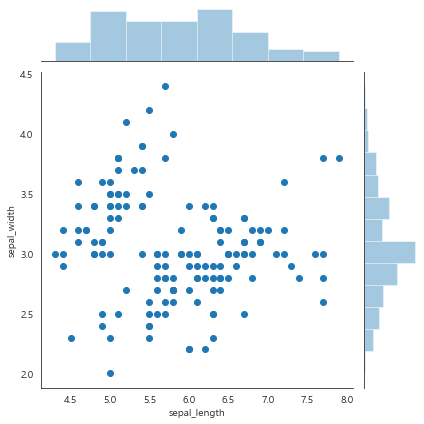

In [19]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind='scatter')
plt.show()

### Scatter Plot(Stripplot)
- matplotlib의 scatterplot과 가장 비슷한 그래프
- `jitter = True`를 설정해야 가로축상의 위치를 겹치지 않게함

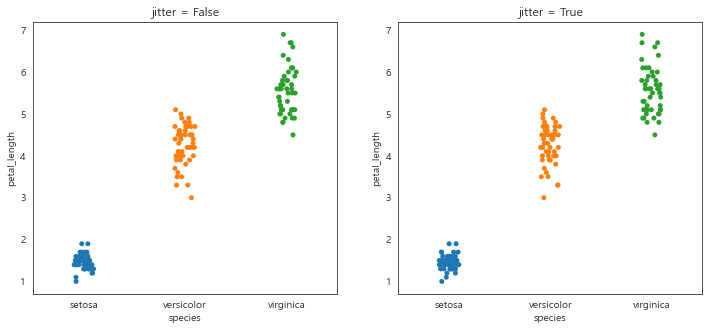

In [20]:
f, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].set_title('jitter = False')
sns.stripplot(x="species", y="petal_length", data=iris, ax = ax[0])

ax[1].set_title('jitter = True')
sns.stripplot(x="species", y="petal_length", jitter = True, data=iris, ax = ax[1])

plt.show()

### Scatter Plot(Swarmplot)
- stripplot과 비슷하지만 점이 겹치지 않게 옆으로 이동시킴

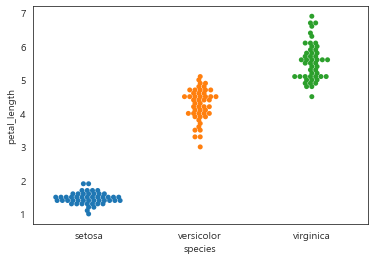

In [23]:
sns.swarmplot(x = 'species', y = 'petal_length',data = iris)
plt.show()

### Distribution plot 
- 러그와 커널 밀도 표시 기능이 있어서 Matplotlib의 `hist` 명령보다 많이 사용

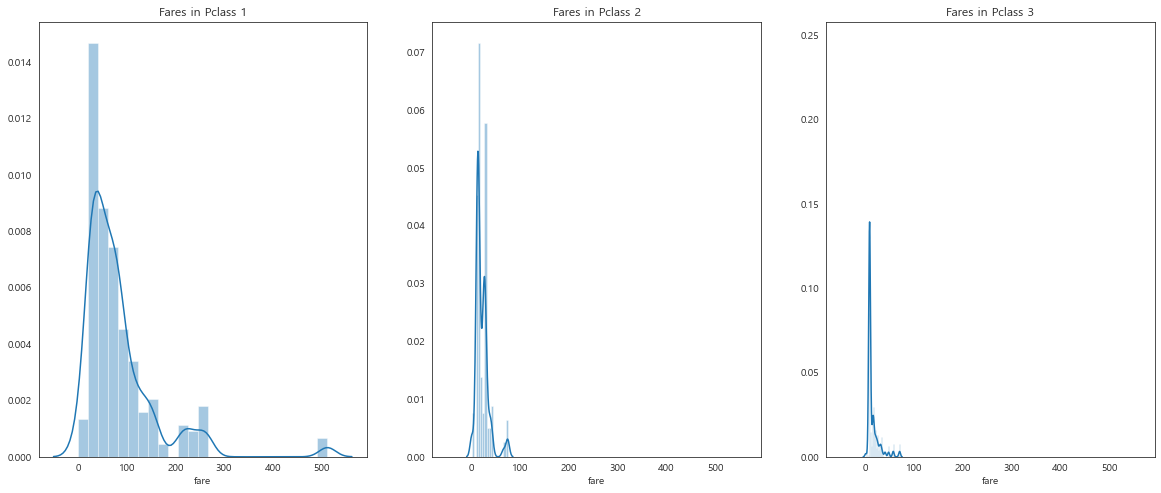

In [28]:
f, ax = plt.subplots(1, 3, figsize=(20,8), sharex=True)

sns.distplot(titanic[titanic['pclass']==1].fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(titanic[titanic['pclass']==2].fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(titanic[titanic['pclass']==3].fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

### KDE Plot 
- 히스토그램보다 부드러운 형태의 분포곡선을 보여주는 방법
* `kdeplot`: http://seaborn.pydata.org/generated/seaborn.kdeplot.html

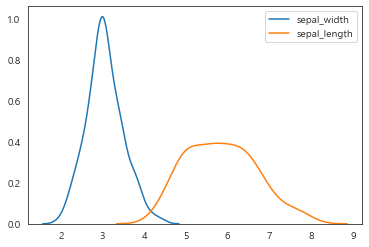

In [30]:
sns.kdeplot(iris.sepal_width)
sns.kdeplot(iris.sepal_length)
plt.show()

### Heatmap
- 만약 데이터가 2차원이고 모든 값이 카테고리 값이면 변수 간 상관관계를 보기위해 `heatmap` 명령을 사용

* `heatmap`: http://seaborn.pydata.org/generated/seaborn.heatmap.html

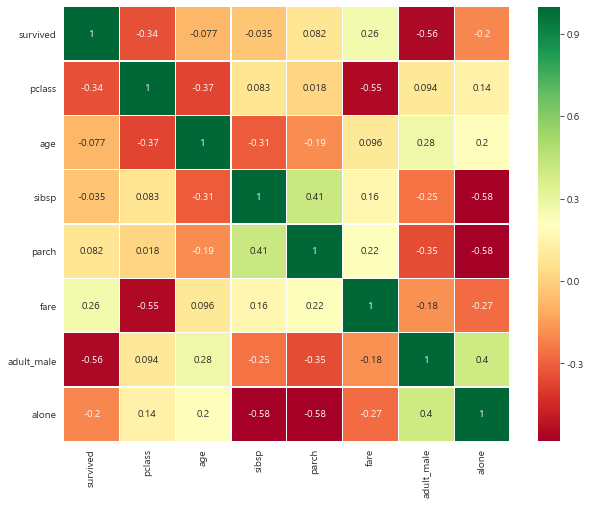

In [32]:
#titanic.corr()-->correlation matrix
sns.heatmap(titanic.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)

# annot=True (안에 값넣기)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()